<h1 align="center" style="color: red;">Data Visualization Using Python</h1>

<h2 style="color:green;">Importing  Librairies </h2>

In [66]:
import pandas as pd  ## Data structures and tools
import numpy as np   ## Arrays and matrices
import matplotlib.pyplot as plt ## Plots and Graphs
from scipy import stats  ## Integrals, solving differential equation and optimization
import seaborn as sns  ## Plots : Heatmaps , time series , violin plots 
from sklearn.linear_model import LinearRegression ## to create simple linear regression models
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split ,cross_val_score## to evaluate and split data our model
from sklearn.compose import ColumnTransformer


<h2 style="color:green;">Importing Data </h2>

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df= pd.read_csv(url,header=None,na_values="?")
df.columns=headers

<h2 style="color:green;">Exporting Data </h2>

In [4]:
path="data.csv"
df.to_csv(path)

<h5 style="color:green;">Printing a specefic number of line using <code>DataFrame.head(n)</code> method</h5>

In [5]:
print(df.head(2))

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  

[2 rows x 26 columns]


<h5 style="color:green;">DataFrame description using methods like 
<code>DataFrame.info()</code> 
<code>DataFrame.dtypes()</code> 
<code>DataFrame.describe()</code>
 </h5>

In [6]:
"""
df.describe() include only columns whith numeric types , we can add a parametre to include all the columns 
df.describe(include="all")
"""
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [7]:
"""
Provides a concise summary of your DataFrame
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
"""
To check Data types
"""
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2 style="color:green;">Pre-processing and Converting data</h2>

In [9]:
df["price"]=pd.to_numeric(df["price"],errors="coerce")
## and then we can convert it to numeric as we can drop the rows that contain Nan Value

### axis=0 removes the row / axis=1 removes the columns
df.dropna(subset=['price'],axis=0,inplace=True)

df["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<h3 style="color:blue;">Replace it by the mean value Instead</h3>

In [10]:
pd.to_numeric(df["normalized-losses"],errors="coerce")

#replace with the mean value 
mean=df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan,mean) ## replace the nan value with the mean one

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 201, dtype: float64

<h2 style="color:green;">Renaming columns</h2>

In [11]:
#replace with the mean value 
df["city-mpg"]=235/df["city-mpg"]
## rename the columns after formatting
df.rename(columns={"city-mpg":"city-L/100Km"},inplace=True)


<h2 style="color:green;">Normalizing a column using a simple feature scaling</h2>

In [12]:
##### normalizing the length which is the one used for this dataset, but you'll find other methods bellow
df["length"]=df["length"]/df["length"].max()
df["length"].head(5)

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

<h2 style="color:green;">Normalizing a column using Min max method</h2>

In [13]:
#### using min max method 
df["length"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())

<h2 style="color:green;">Normalizing a column using Z score</h2>

In [14]:
### usign z core
df["length"]=(df["length"]-df["length"].mean())/df["length"].std()

<h2 style="color:green;">Binning in python:</h2>

In [15]:
### creating bins:
bins = np.linspace(min(df['price']),max(df['price']),4)
group_names=["Low", "Medium","High"]
df["price-binned"]=pd.cut(df['price'],bins,labels=group_names,include_lowest=True)
for price, price_binned in zip(df["price"].head(5), df["price-binned"].head()):
    print(f"Price: {price}, Price Binned: {price_binned}")
    

Price: 13495.0, Price Binned: Low
Price: 16500.0, Price Binned: Low
Price: 16500.0, Price Binned: Low
Price: 13950.0, Price Binned: Low
Price: 17450.0, Price Binned: Low


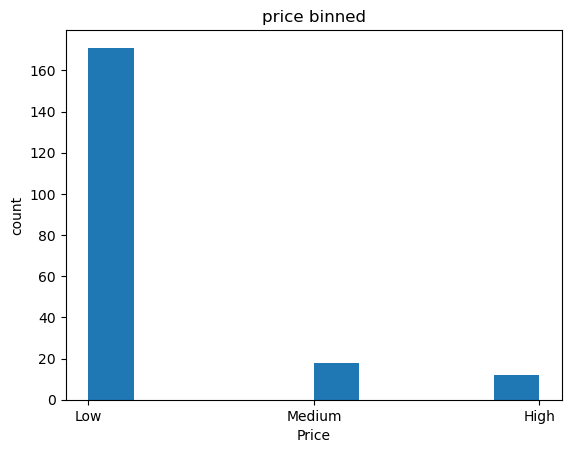

In [16]:
plots = []
fig1, ax1 = plt.subplots()
plots.append(ax1)
ax1.hist(df["price-binned"])
ax1.set_xlabel("Price")
ax1.set_ylabel("count")
ax1.set_title("price binned")
plt.show()


<h5 style="color:blue;">Turning categorical variables into quantitative variables in Python</h5>

In [17]:
## get_dummies function converts categorical variable into dummy/indicator variables
dummy_variable_2=pd.get_dummies(df['aspiration'])
## renaming the columns
dummy_variable_2.rename(columns={"std":"aspiration-std","turbo":"aspiration-turbo"},inplace=True)
## concat the new dataframe that has two columns now std and turbo with the existing dataFrame
df=pd.concat([df,dummy_variable_2],axis=1)


<h2 style="color:green;">Summarize the categorical data using <code>Columns.value_counts()</code> </h2>

In [18]:
drive_wheel_count=df["drive-wheels"].value_counts()
drive_wheel_count

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

<h2 style="color:green">Group the data using <code>DataFrame.groupby()</code></h2>

In [19]:
### group by 
df_test= df[["drive-wheels","body-style","price"]]
"""
By setting as_index=False, the group columns will not be used as the index and will remain as regular columns in the output DataFrame
Will group by the combination of "drive-wheels" and "body-style" and calculate the mean the price
"""
df_grp = df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p> These values are not the easier to read , that is why we use the method <code>pivot()</code></p>

In [20]:
### Return reshaped DataFrame organized by given index / column values.
df_pivot= df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

We can also visualize the data using heatmaps

C:\Users\acer\AppData\Local\Temp\ipykernel_7692\3307267215.py:9: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig2.colorbar(c,ax=ax2)


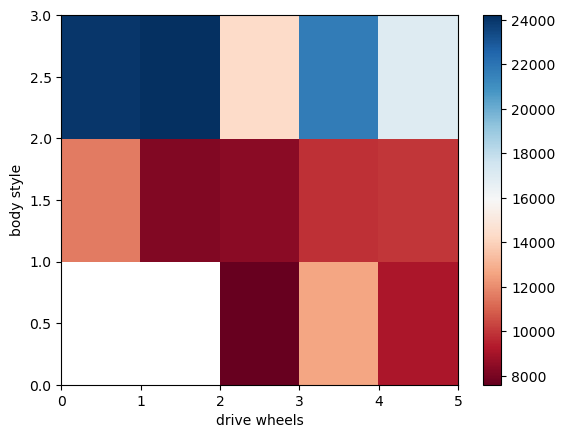

In [21]:
#### using the heatmap
fig2, ax2 = plt.subplots()
plots.append(fig2)

ax2.set_xlabel("drive wheels")
ax2.set_ylabel("body style")

c=ax2.pcolor(df_pivot,cmap="RdBu")
fig2.colorbar(c,ax=ax2)
plt.show()

<h2 style="color:green">Analysis of variance (ANOVA)</h2>

In [22]:
### the anova method
df_anova = df[["make","price"]]
grouped_anova = df_anova.groupby("make")
anova_results_1=stats.f_oneway (
    grouped_anova.get_group("honda") ["price"],
    grouped_anova.get_group ("subaru") ["price"])

anova_results_1


F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

The prices between Hondas and Subarus are not significantly different, as the F-test score is less than 1 and p-value is larger than 0.05.

<h2 style="color:green;">Correlation</h2>

•	Measures to what extent different variables are interdependent.

(0.0, 48177.33725678761)

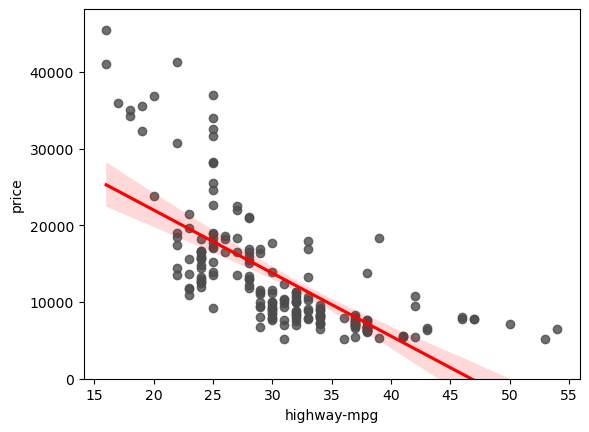

In [23]:
### correlation
fig3, ax3= plt.subplots()
plots.append(fig3)


sns.regplot(x="highway-mpg",y="price",data=df,color=".3", line_kws=dict(color="r"))
plt.ylim(0,) ## add a regression line to indicate the relationship between the 2

<h3>Calculate the correlation</h3>

In [24]:
df_cleaned = df.dropna(subset=["horsepower", "price"])
person_coef, p_value = stats.pearsonr(df_cleaned["horsepower"], df_cleaned["price"])
print(person_coef)
print(p_value)

0.8105330821322063
1.1891278276945975e-47


person_coef is close to 1 means there is a strong positive correlation between the two variables
the p_value is small that means that the observed correlation is not due to random chance, indicating a strong likelihood of a true association between "horsepower" and "price".

<h2 style="color:green;">Model Developement</h2>

<h3 style="color:blue;">Simple linear regression</h3>

In [25]:
## create an object of the LinearRegression() class
lm=LinearRegression()
## define the predictor variables and the target variables
X= df[["highway-mpg"]]
Y=df[["price"]]
## train the model using the fit method
lm.fit(X,Y)
## obtain a predictio using the method predict
prediction=lm.predict(X)
prediction


array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682],
       [14593.03788682],
       [15414.77126514],
       [15414.77126514],
       [17879.97140011],
       [20345.17153508],
       [20345.17153508],
       [21988.63829172],
       [-5128.5631929 ],
       [ 3088.77059031],
       [ 3088.77059031],
       [ 4732.23734696],
       [ 7197.43748192],
       [13771.3045085 ],
       [ 7197.43748192],
       [ 7197.43748192],
       [ 7197.43748192],
       [13771.3045085 ],
       [13771.3045085 ],
       [18701.70477843],
       [-5950.29657123],
       [ 7197.43748192],
       [ 3910.50396864],
       [10484.37099521],
       [10484.37099521],
       [10484.37099521],
       [10484.37099521],
       [11306.10437353],
       [11306.10437353],
       [11306.10437353],
       [11306.10437353],


<h5>Showing the values of the intercept <code>b<sub>0</sub></code></h5>

In [26]:
lm.intercept_

array([38423.30585816])

<h5>Showing the values of the slope <code>b<sub>1</sub></code></h5>

In [27]:
lm.coef_

array([[-821.73337832]])

<p style="color:purple">The relationship is </p>
<ul><li>Price = 38423.31 - 821.73 * highway-mpg</li></ul>

<h3 style="color:blue;">Multiple linear regression</h3>

In [28]:

## create an object of the LinearRegression() class
lmm=LinearRegression()
## define the predictor variables and the target variables

horsepower_mean = df['horsepower'].mean()

# Replace NaN values in 'horsepower' with the calculated mean
df['horsepower'] = df['horsepower'].fillna(horsepower_mean)
Z= df[['horsepower',"curb-weight","engine-size","highway-mpg"]]
## train the model using the fit method
lmm.fit(Z,df["price"])
## obtain a predictio using the method predict
##prediction_lmm=lmm.predict(np.array[[]]) should be the same number of rows


LinearRegression()

In [29]:
print("the intercept value is ", lmm.intercept_)
print("the slope value is ",lmm.coef_)

the intercept value is  -15824.03820823448
the slope value is  [53.61042729  4.70886444 81.47225667 36.39637823]


which means that the model equation is <code>Y= intercept + slope1*X<sub>1</sub> + slope2* X<sub>2</sub></code>
<ul><li>Y=15824+15824X<sub>1</sub>+4.70X<sub>2</sub>....​
</li></ul>

<h3 style="color:green">Model Evaluating using visualization</h3>

<h5 style="color:blue;">Regression Plot</h5>

(0.0, 48179.724467810185)

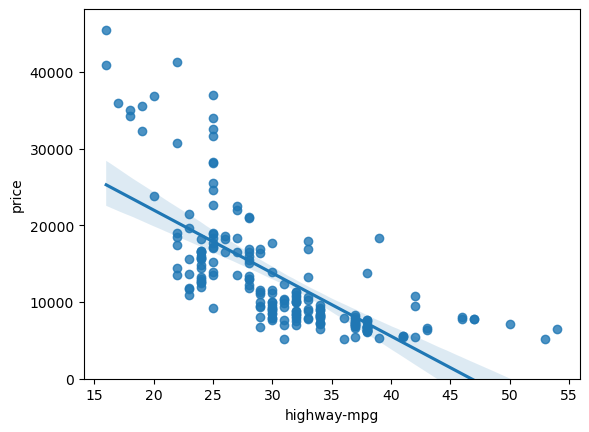

In [30]:
ax4=sns.regplot(x="highway-mpg",y="price",data=df)
plots.append(ax4)
plt.ylim(0,)

<h5 style="color:blue;">Residual Plot</h5>

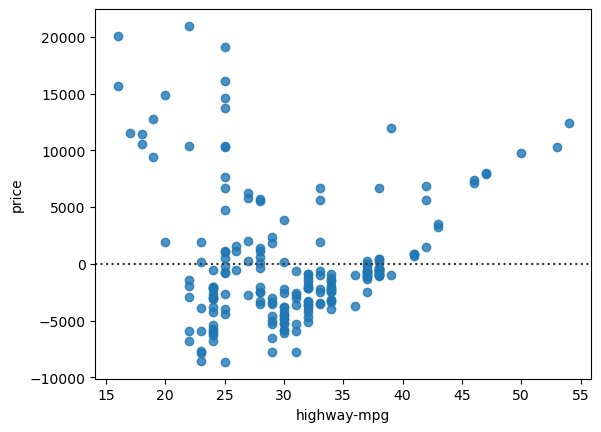

In [31]:
ax5=sns.residplot(x="highway-mpg",y="price",data=df)
plots.append(ax5)

<h5 style="color:blue;">Distribution Plot</h5>

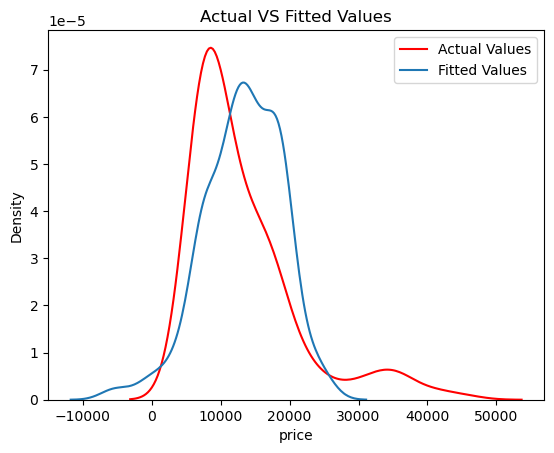

In [32]:
fig6, ax6= plt.subplots()
## display and kde plot for actual values
sns.kdeplot(x="price",data=df,color='red',label="Actual Values",ax=ax6)
## display and kde plot for the fitted values
sns.kdeplot(prediction,color='blue',label="Fitted Values",ax=ax6)
ax6.legend()
ax6.set_title('Actual VS Fitted Values')
plots.append(ax6)


<h3 style="color:blue;">Polynomial regression and pipelines</h3>

Polynomial Regression

In [33]:
"""
StandardScaler is used to standardize the input data in a 
way that ensures that the data points have a balanced scale,
which is crucial for machine learning algorithms, 
especially those that are sensitive to differences in feature scales.
"""
SCALE=StandardScaler()
## Computes the mean and standard deviation of the input data for each feature 
SCALE.fit([df["horsepower"],df["highway-mpg"]])
## Transforms the input data using the mean and standard deviation calculated in the fit step
x_scale=SCALE.transform([df["horsepower"],df["highway-mpg"]])
## x_scale will contain the standardized values for both horsepower and highway-mpg.


Pipelines

In [34]:
## create a list of tuples:
## 1st element contains the name of the estimator
## 2nd element contains model constructor
Input=[('scale',StandardScaler()),
       ('polynomial',PolynomialFeatures(degree=2)),
       ('mode',LinearRegression())
       ]
## create the pipeline object
pipe=Pipeline(Input)
Ypipe=df["price"]
Xpipe=df[["horsepower","curb-weight","engine-size","highway-mpg"]]
pipe.fit(Xpipe,Ypipe)

ythat=pipe.predict(Xpipe)

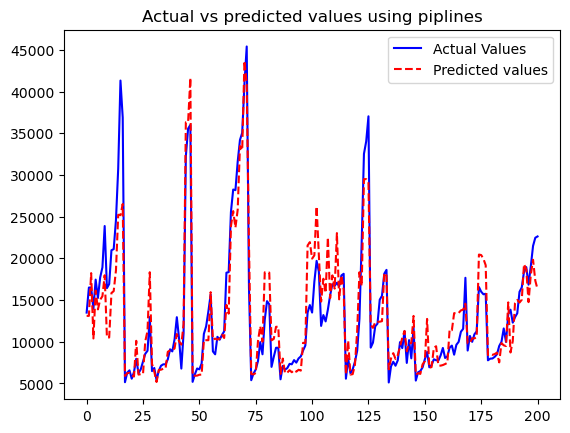

In [35]:
fig7, ax7 =plt.subplots()

ax7.plot(Ypipe.values,label="Actual Values",color="blue",linestyle="-")
ax7.plot(ythat,label="Predicted values",color="red",linestyle="--")
ax7.legend()
ax7.set_title("Actual vs predicted values using piplines")
plots.append(ax7)

<h2 style="color:green;">Measures for simple evaluation:</h2>

using mse function

In [36]:
print("MSE of simple linear regression",mean_squared_error(df["price"],prediction))
print("MSE pipline",mean_squared_error(df["price"],ythat))

MSE of simple linear regression 31635042.944639895
MSE pipline 9655770.595172966


using the score function, the closer the value to 1 the better

In [37]:
print("The r^2 value of Simple linear regression is ", lm.score(X,Y))
print("The r^2 value of the Multi linear regression is ", lmm.score(Z,Y))

The r^2 value of Simple linear regression is  0.4965911884339175
The r^2 value of the Multi linear regression is  0.8094130135602673


<h2 style="color:green">Prediction and Decision Making
</h2>

In [38]:
new_input=np.arange(1,101,1).reshape(-1,1)
ythat_prediction_making=lm.predict(new_input)
ythat_prediction_making

c:\ProgramData\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 37601.57247984],
       [ 36779.83910151],
       [ 35958.10572319],
       [ 35136.37234487],
       [ 34314.63896655],
       [ 33492.90558823],
       [ 32671.1722099 ],
       [ 31849.43883158],
       [ 31027.70545326],
       [ 30205.97207494],
       [ 29384.23869662],
       [ 28562.50531829],
       [ 27740.77193997],
       [ 26919.03856165],
       [ 26097.30518333],
       [ 25275.57180501],
       [ 24453.83842668],
       [ 23632.10504836],
       [ 22810.37167004],
       [ 21988.63829172],
       [ 21166.9049134 ],
       [ 20345.17153508],
       [ 19523.43815675],
       [ 18701.70477843],
       [ 17879.97140011],
       [ 17058.23802179],
       [ 16236.50464347],
       [ 15414.77126514],
       [ 14593.03788682],
       [ 13771.3045085 ],
       [ 12949.57113018],
       [ 12127.83775186],
       [ 11306.10437353],
       [ 10484.37099521],
       [  9662.63761689],
       [  8840.90423857],
       [  8019.17086025],
       [  7197.43748192],
       [  63

many values are negative

<h2 style="color:green;">Model Evaluation and Refinement</h2>

In [ ]:
x_data=df[["wheel-base","stroke","horsepower","compression-ratio","peak-rpm","city-L/100Km"]]
y_data=df["price"]
## clean data
x_data=x_data.dropna()## drop none values 
y_data=y_data.dropna()
y_data=y_data[x_data.index] ## have the same rows for y_data
x_data.notnull().sum()

wheel-base           195
stroke               195
horsepower           195
compression-ratio    195
peak-rpm             195
city-L/100Km         195
dtype: int64

In [89]:

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
Input2=[('scale',StandardScaler()),
       ('polynomial',PolynomialFeatures(degree=2)),
       ('mode',LinearRegression())
       ]
## create the pipeline object
pipe2=Pipeline(Input2)

pipe2.fit(x_train,y_train).score(x_test,y_test)


0.872504781774446

the score value is close to 1 which means that the pipe2 performs well

to evaluate our model we use <code>cross_val_score()</code>

In [91]:
score=cross_val_score(pipe2,x_data,y_data,cv=3)
score

array([ 0.42076925,  0.57034689, -0.88832759])

The cross-validation scores indicate varying model performance: fold 1 (42%), fold 2 (57%), and fold 3 (-88%). The negative score suggests poor generalization or data handling issues in specific subsets.

<h2 style="color:green;">Overfitting, Underfitting and Model Selection</h2>

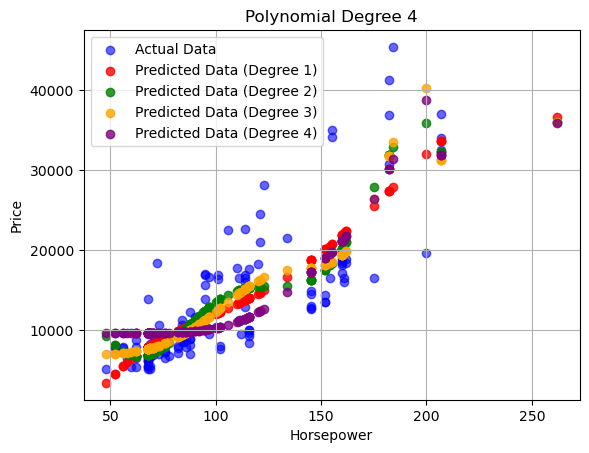

In [113]:
# Initialize an empty list to store R² scores for the test set
Rsqu_test=[]
# Define the polynomial degrees to iterate over
order = [1,2,3,4]
fig8, ax8= plt.subplots()
colors = ['red', 'green', 'orange', 'purple']
for i,n in enumerate(order):
    # Create a PolynomialFeatures object for the current degree
    
    pr=PolynomialFeatures(degree=n)
    # Transform the training and testing data for the 'horsepower' feature
    
    x_train_pr=pr.fit_transform(x_train[["horsepower"]])
    
    x_test_pr=pr.fit_transform(x_test[["horsepower"]])
    pipe2.fit(x_train_pr,y_train)
    
    Rsqu_test.append(pipe2.score(x_test_pr,y_test))
    
    # Generate predictions for the training data
    y_train_pred = pipe2.predict(x_train_pr)
    
     # Plot the actual data (only once, in blue)
    if i == 0:
        ax8.scatter(x_train["horsepower"], y_train, color="blue", label="Actual Data", alpha=0.6)
    
    # Plot the polynomial fit for the current degree
    ax8.scatter(
        x_train["horsepower"],
        y_train_pred,
        color=colors[i],
        label=f"Predicted Data (Degree {n})",
        alpha=0.8
    )
    
    ax8.set_title(f'Polynomial Degree {n}')
    ax8.set_xlabel('Horsepower')
    ax8.set_ylabel('Price')
    ax8.legend()
    ax8.grid(True)
    
plots.append(ax8)
